In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('climate_action_data.csv')


print(f"Original shape: {df.shape}")
print("\nMissing values:\n", df.isnull().sum())
print("\nerror entries:\n", df.eq('error').sum())

Original shape: (913, 10)

Missing values:
 Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

error entries:
 Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64


In [5]:
# Replace errors
df.replace('error', np.nan, inplace=True)

# Convert columns to numeric 
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
               'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values
df.dropna(subset=['Crop_Type', 'Date'], inplace=True)  
df['Soil_Moisture(%)'].fillna(df.groupby('Crop_Type')['Soil_Moisture(%)'].transform('median'), inplace=True)

# Remove duplicates
df.drop_duplicates(subset=['Sensor_ID', 'Date'], inplace=True)

print(f"\nCleaned shape: {df.shape}")



Cleaned shape: (794, 10)


C:\Users\byaru\AppData\Local\Temp\ipykernel_780\1735302777.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Soil_Moisture(%)'].fillna(df.groupby('Crop_Type')['Soil_Moisture(%)'].transform('median'), inplace=True)


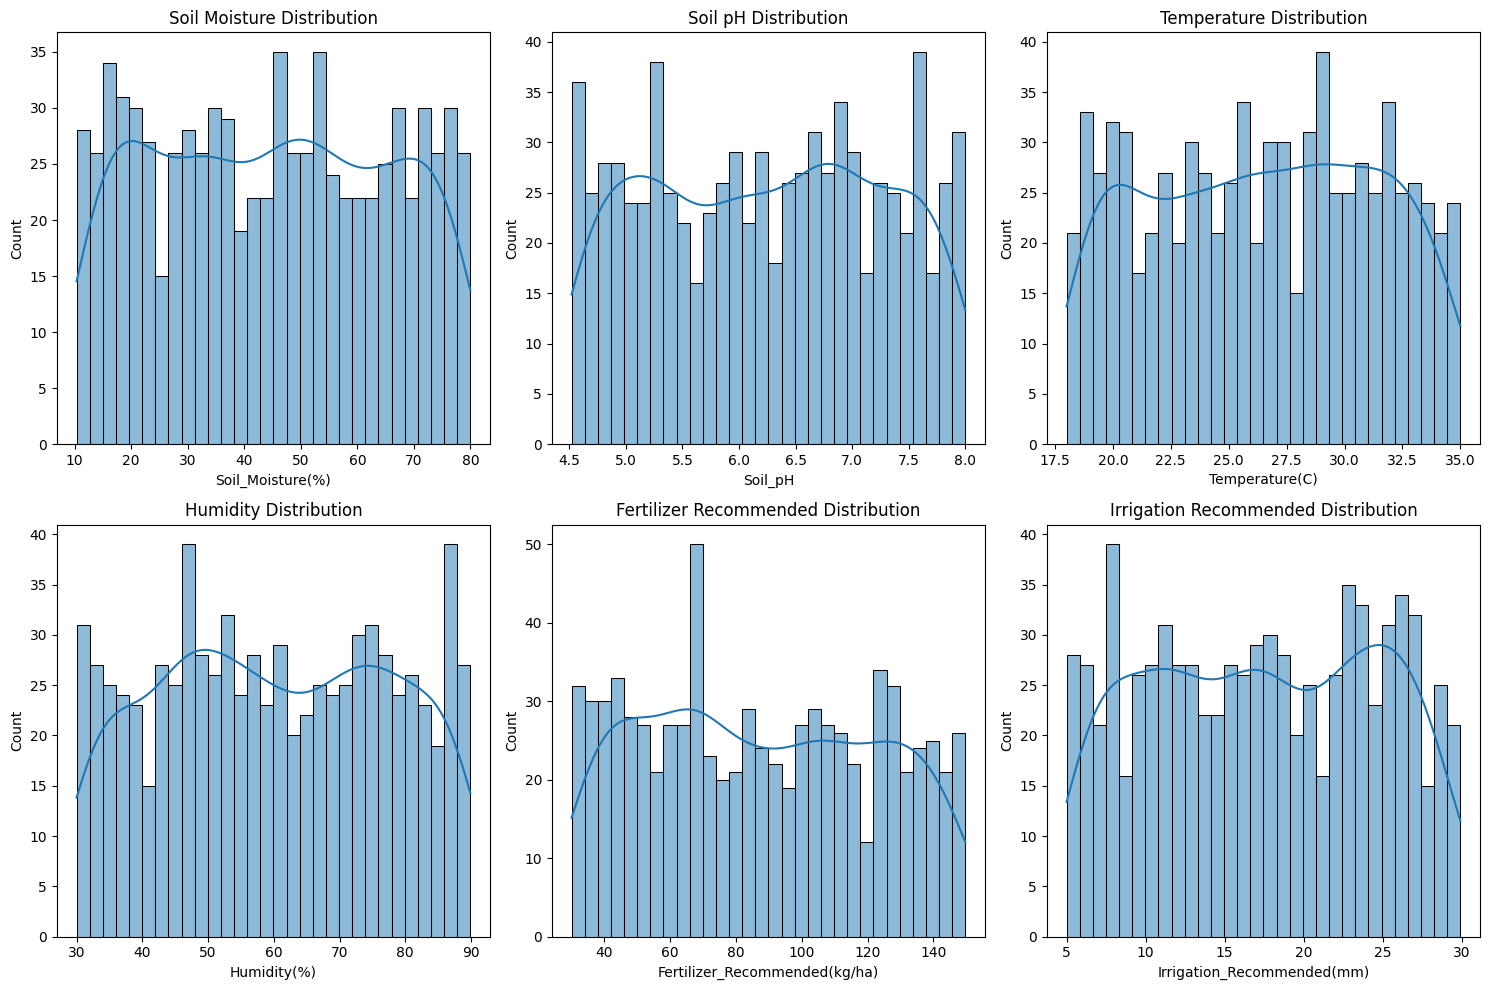

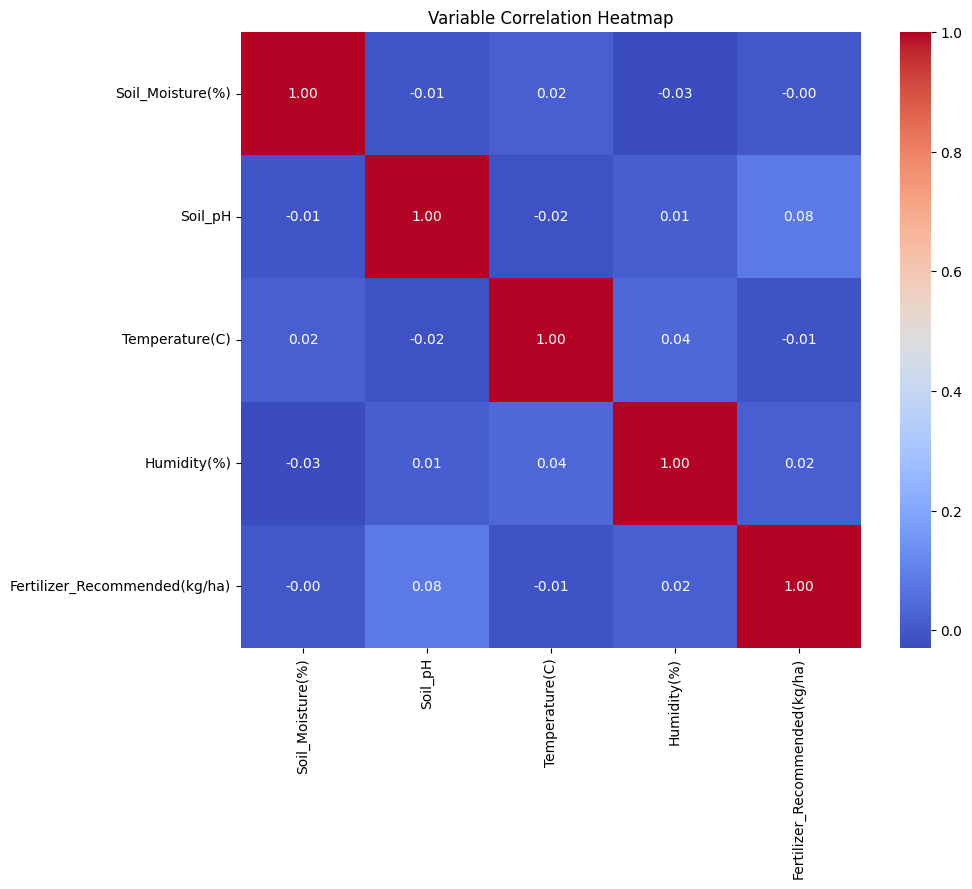

In [ ]:
plt.figure(figsize=(15, 10))

# Histograms
plt.subplot(2, 3, 1)  
sns.histplot(df['Soil_Moisture(%)'], bins=30, kde=True)
plt.title('Soil Moisture Distribution')

plt.subplot(2, 3, 2) 
sns.histplot(df['Soil_pH'], bins=30, kde=True)
plt.title('Soil pH Distribution')

plt.subplot(2, 3, 3)
sns.histplot(df['Temperature(C)'], bins=30, kde=True)
plt.title('Temperature Distribution')

# Row 2
plt.subplot(2, 3, 4) 
sns.histplot(df['Humidity(%)'], bins=30, kde=True)
plt.title('Humidity Distribution')

plt.subplot(2, 3, 5) 
sns.histplot(df['Fertilizer_Recommended(kg/ha)'], bins=30, kde=True)
plt.title('Fertilizer Recommended Distribution')

plt.subplot(2, 3, 6)  
sns.histplot(df['Irrigation_Recommended(mm)'], bins=30, kde=True)
plt.title('Irrigation Recommended Distribution')

plt.tight_layout()  
plt.show()

# Correlation heatmap 
plt.figure(figsize=(10, 8))
corr_matrix = df[['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)',
                'Fertilizer_Recommended(kg/ha)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Variable Correlation Heatmap')
plt.show()

In [ ]:
#Variables influencing fertilizer recommendations
fertilizer_corr = corr_matrix['Fertilizer_Recommended(kg/ha)'].sort_values(ascending=False)
print("\nFertilizer Correlation:\n", fertilizer_corr)

#Crop with highest average soil moisture
moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print("\nAverage Soil Moisture by Crop:\n", moisture_by_crop.head(1))

#Irrigation adjustments for high-temperature crops
high_temp_crops = df[df['Temperature(C)'] > 30]
irrigation_adjustments = high_temp_crops.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().apply(
    lambda x: f"Increase by {max(0, 5 - x):.1f}mm" if x < 5 else "Maintain current"
)
print("\nIrrigation Adjustments for Crops >30°C:\n", irrigation_adjustments)


Fertilizer Correlation:
 Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Name: Fertilizer_Recommended(kg/ha), dtype: float64

Average Soil Moisture by Crop:
 Crop_Type
Wheat    47.191599
Name: Soil_Moisture(%), dtype: float64

Irrigation Adjustments for Crops >30°C:
 Crop_Type
Beans       Maintain current
Lettuce     Maintain current
Maize       Maintain current
Tomatoes    Maintain current
Wheat       Maintain current
Name: Irrigation_Recommended(mm), dtype: object


In [18]:
df.shape

(794, 10)

In [17]:
print(df.describe())

       Soil_Moisture(%)     Soil_pH  Temperature(C)  Humidity(%)  \
count        794.000000  789.000000      789.000000   789.000000   
mean          44.773539    6.246946       26.469962    60.084791   
std           20.439340    1.024433        4.872233    17.466630   
min           10.350000    4.520000       18.000000    30.000000   
25%           26.970000    5.320000       22.300000    46.000000   
50%           45.230000    6.250000       26.600000    59.800000   
75%           62.642500    7.080000       30.600000    75.300000   
max           79.980000    8.000000       35.000000    89.900000   

       Fertilizer_Recommended(kg/ha)  Irrigation_Recommended(mm)  
count                     789.000000                  789.000000  
mean                       87.304816                   17.401521  
std                        34.966482                    7.171804  
min                        30.000000                    5.000000  
25%                        57.100000                

In [16]:
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)